In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("D:/Chools/Day_06/claimants.csv")

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df = df.drop('CASENUM', axis=1)

In [5]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [7]:
# Remove the duplicates
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
# Handling missing values with mode imputation
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   float64
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(6)
memory usage: 62.9 KB


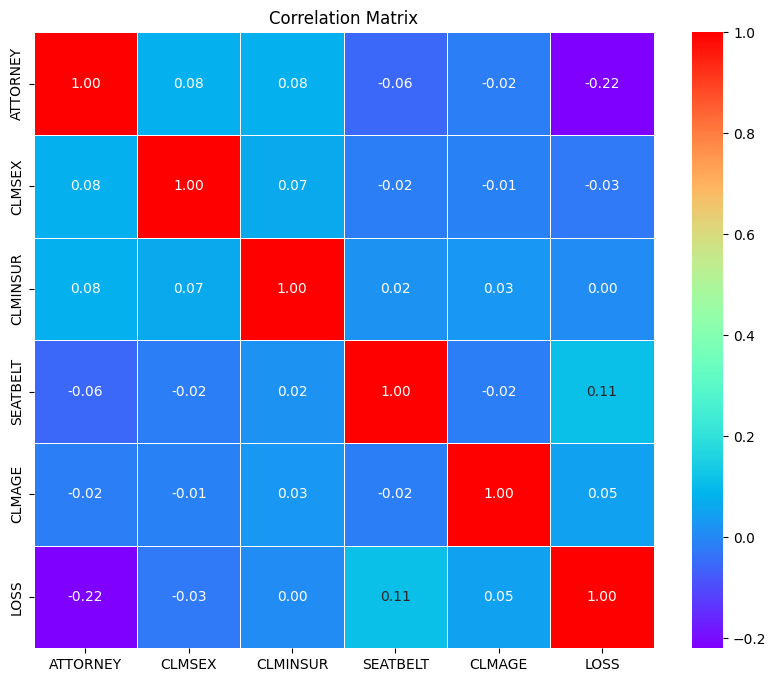

In [10]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

In [12]:
# Calculate VIF for all predictors
vif_df = calculate_vif(df)

# Display VIF
print("VIF for each variable:")
print(vif_df)

VIF for each variable:
   Variable       VIF
0  ATTORNEY  1.990925
1    CLMSEX  2.178200
2  CLMINSUR  4.104834
3  SEATBELT  1.031283
4    CLMAGE  2.422950
5      LOSS  1.183830


In [13]:

selected_columns = ['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS']


In [14]:

# Creating feature matrix (X) and target variable (y)
X = df[selected_columns]
y = df['ATTORNEY'] 


In [15]:

# Handling categorical variables if needed (e.g., CLMSEX)
label_encoder = LabelEncoder()
X['CLMSEX'] = label_encoder.fit_transform(X['CLMSEX'])


C:\Users\cgunj\AppData\Local\Temp\ipykernel_22568\196878521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CLMSEX'] = label_encoder.fit_transform(X['CLMSEX'])


<Figure size 1500x1000 with 0 Axes>

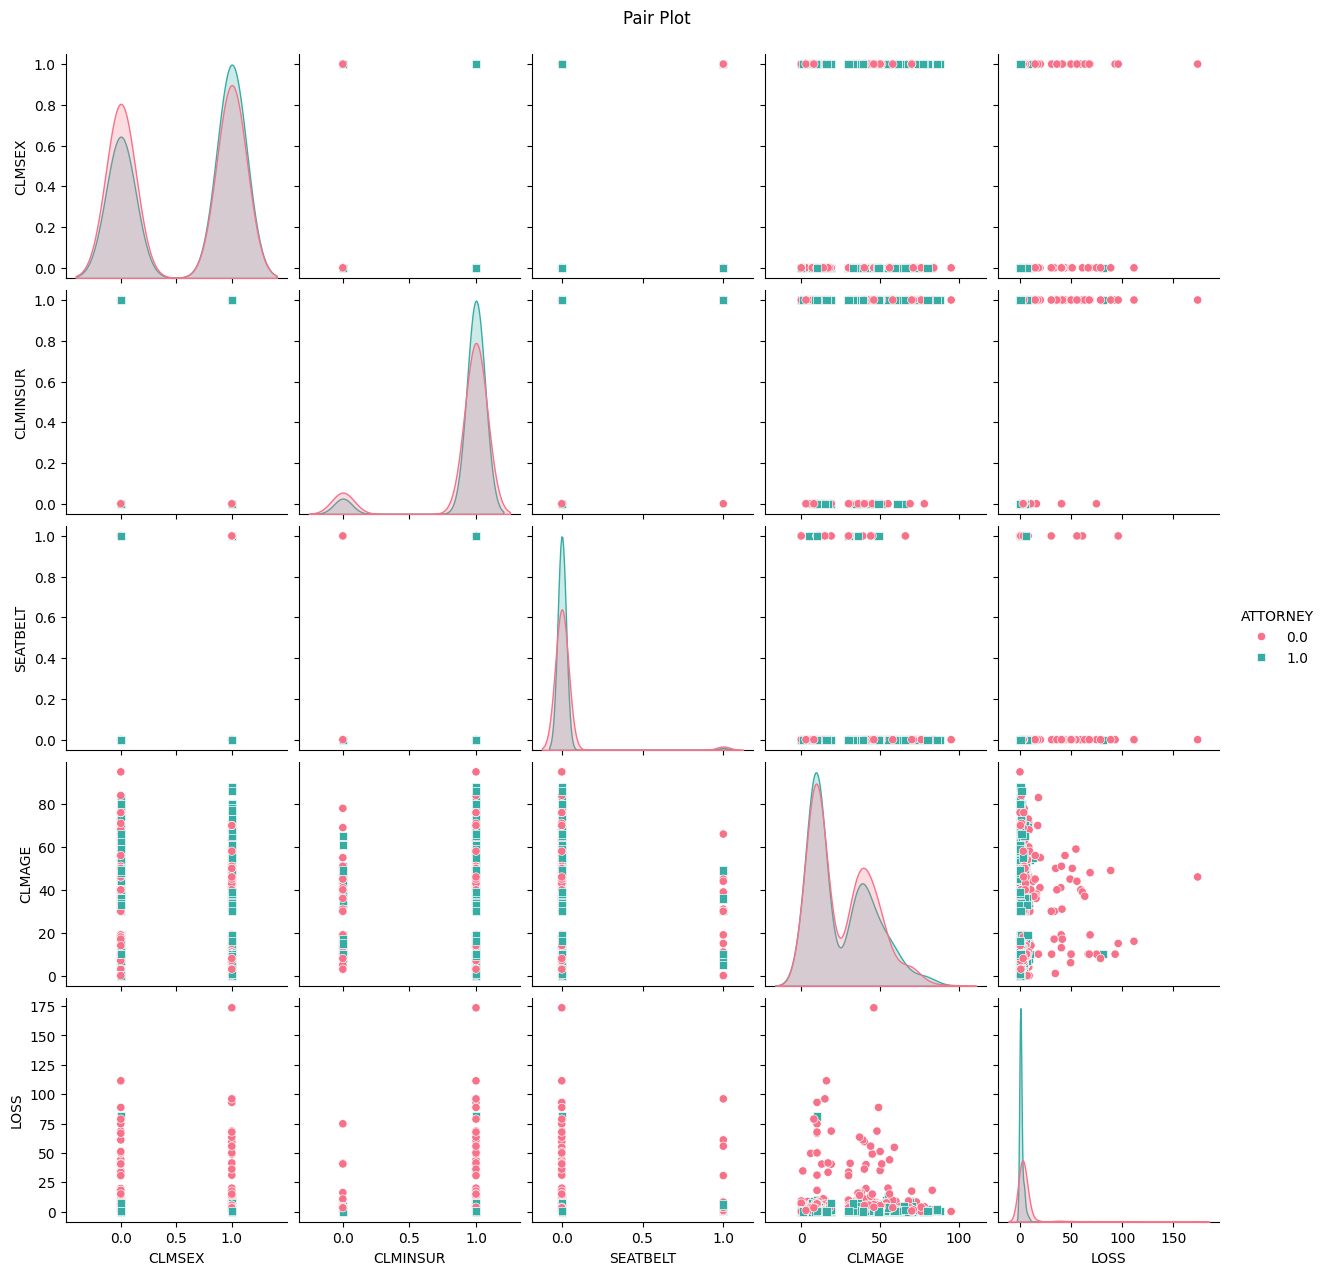

In [16]:
# Combine X and y for the pair plot
pairplot_data = pd.concat([X, y], axis=1)

# Plot the pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(pairplot_data, hue='ATTORNEY', palette='husl', markers=["o", "s"])
plt.suptitle("Pair Plot", y=1.02)
plt.show()

In [17]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

In [18]:
# Fit the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)
print(r2_score(y_test,y_pred))



Accuracy: 0.7388059701492538
Confusion Matrix:
 [[ 85  43]
 [ 27 113]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.66      0.71       128
         1.0       0.72      0.81      0.76       140

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268

-0.046875


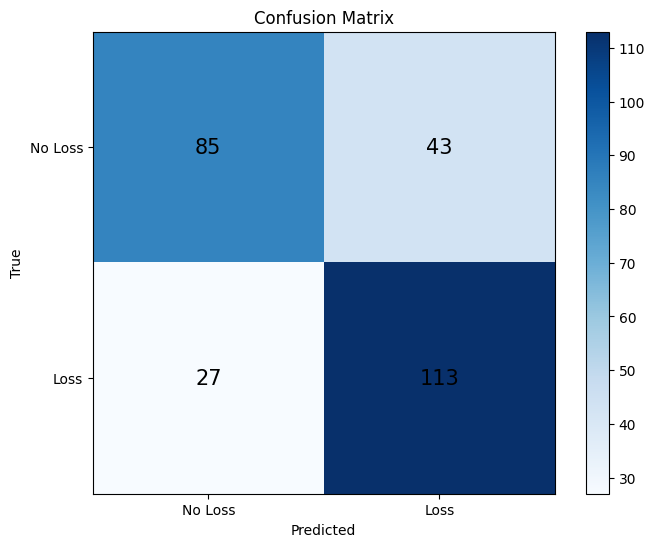

In [21]:
# Display the confusion matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Display the values in the confusion matrix
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=15)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['No Loss', 'Loss'])
plt.yticks([0, 1], ['No Loss', 'Loss'])
plt.show()


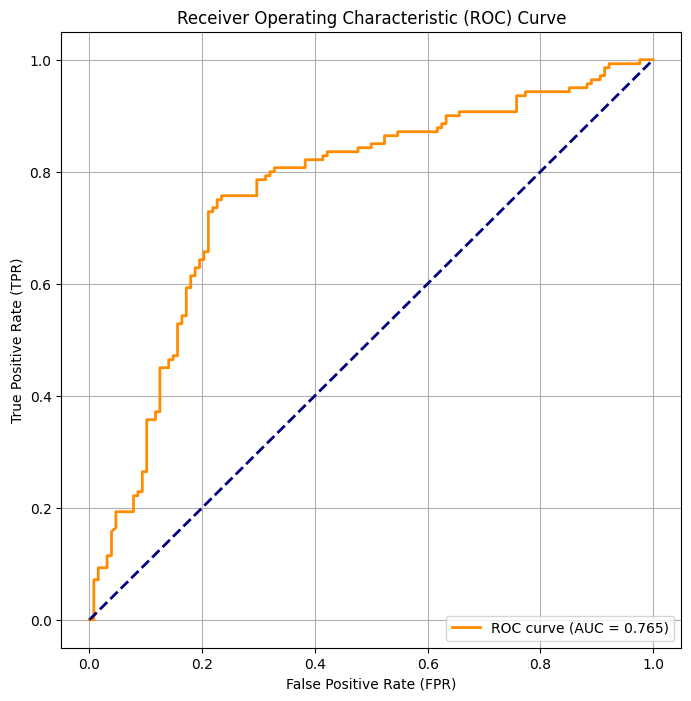

In [22]:
# Plot the ROC curve with improvements
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()